# BorutaPy 

1. 데이터 구조 보기

In [1]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf' # 본인이 사용하고 있는 한글 폰트 경로로 변경

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# Matplotlib에서 한글 폰트로 지정
plt.rc('font', family=font_name)

# Matplotlib에서 마이너스 기호가 제대로 보이도록 설정
plt.rc('axes', unicode_minus=False)

# load dataset
df = pd.read_csv('20221205_processed-data.csv', na_values="#DIV/0!",
                    encoding='cp949')
df


,ID,분양,D_진단,D_name,control,Disease,PanC,Stage_PanC,early_PanC,late_PanC,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
0,HV_BBC 3,1,일반인,Normal,1,0,0,NaN,0,0,...,0.475478,3.030812,1.724844,8.436778,0.450747,1.108430,7.058081,10.065168,4.706329,9.944471
1,HV_BBC 4,1,일반인,Normal,1,0,0,NaN,0,0,...,-0.038368,1.812680,2.315562,8.891986,0.518586,0.886849,6.035079,9.918289,5.106949,9.261223
2,HV_BBC 5,1,일반인,Normal,1,0,0,NaN,0,0,...,0.834012,2.012563,2.407478,9.675466,1.349631,1.996821,5.968362,10.444261,5.624845,10.363895
3,HV_BBC 6,1,일반인,Normal,1,0,0,NaN,0,0,...,-0.010182,1.980614,2.216329,9.384083,1.438091,1.986842,5.758721,10.225154,5.260505,10.020001
4,HV_BBC 8,1,일반인,Normal,1,0,0,NaN,0,0,...,0.281600,2.086971,2.595080,9.531601,0.711708,2.090135,5.999020,9.676872,5.529530,10.136948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,HV_BBC 1959,4,대장암,CRC,0,1,0,NaN,0,0,...,0.503027,3.741000,2.742000,10.141700,1.955725,2.291632,6.769793,9.909323,6.041789,10.873343
1783,HV_BBC 1960,4,대장암,CRC,0,1,0,NaN,0,0,...,1.018335,1.371184,1.814377,9.779418,0.783163,3.045747,6.258261,11.592385,6.027217,10.907264
1784,HV_BBC 1961,4,간암,HCC,0,1,0,NaN,0,0,...,0.342234,4.436584,2.770455,9.687212,1.379728,2.345304,7.620479,9.367259,5.717017,10.852904
1785,HV_BBC 1962,4,간암,HCC,0,1,0,NaN,0,0,...,1.308269,6.023255,2.848168,9.148451,1.033279,3.159494,6.139030,10.535218,5.882471,10.163112


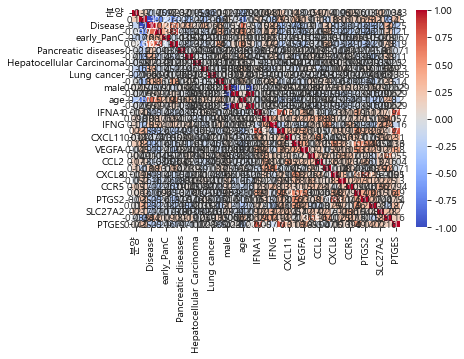

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
# 정규화
scaler = MinMaxScaler()
scaler.fit(df.iloc[:, 19:])
data_scaled = scaler.transform(df.iloc[:, 19:])
data = pd.DataFrame(data=data_scaled, columns=df.iloc[:, 19:].columns)
data

,age,gender,IFNA1,TNF,IFNG,IFNL1,CXCL11,CLEC7A,VEGFA,FOXP3,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
0,0.367647,0.0,0.798850,0.261206,0.305265,0.474599,0.560839,0.173526,0.592457,0.418546,...,0.261896,0.289740,0.606598,0.408068,0.288896,0.140822,0.657298,0.662610,0.205484,0.632623
1,0.455882,0.0,0.807145,0.293963,0.237364,0.491151,0.741602,0.164802,0.638567,0.565374,...,0.176126,0.204024,0.694884,0.491449,0.297545,0.118753,0.561872,0.644090,0.304814,0.576536
2,0.470588,0.0,0.868523,0.434391,0.309906,0.577716,0.899114,0.339086,0.709782,0.558758,...,0.321742,0.218089,0.708622,0.634960,0.403492,0.229302,0.555649,0.710409,0.433222,0.667053
3,0.470588,0.0,0.789097,0.308507,0.223829,0.458200,0.739111,0.258866,0.665838,0.458222,...,0.180831,0.215841,0.680053,0.581587,0.414769,0.228308,0.536094,0.682782,0.342887,0.638823
4,0.455882,0.0,0.796219,0.380851,0.225040,0.456471,0.763445,0.228523,0.665293,0.533451,...,0.229535,0.223325,0.736660,0.608608,0.322165,0.238596,0.558509,0.613650,0.409589,0.648423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,0.808824,1.0,0.604392,0.248021,0.368748,0.452430,0.680395,0.510715,0.708942,0.599802,...,0.266494,0.339714,0.758618,0.720361,0.480761,0.258664,0.630407,0.642960,0.536600,0.708872
1783,0.500000,0.0,0.802951,0.205043,0.405261,0.510625,0.595867,0.259814,0.571847,0.362181,...,0.352508,0.172957,0.619979,0.654001,0.331275,0.333771,0.582691,0.855175,0.532987,0.711657
1784,0.794118,1.0,0.625033,0.102995,0.215483,0.431501,0.533962,0.289399,0.619962,0.566582,...,0.239655,0.388660,0.762871,0.637112,0.407329,0.264010,0.709759,0.574611,0.456075,0.707194
1785,0.779412,0.0,0.637612,0.203506,0.379056,0.487656,0.696100,0.467286,0.668761,0.519800,...,0.400903,0.500309,0.774486,0.538426,0.363161,0.345100,0.571569,0.721878,0.497098,0.650571


In [4]:
new_df = pd.concat([df.loc[:, 'D_name'], data], axis=1)
new_df

,D_name,age,gender,IFNA1,TNF,IFNG,IFNL1,CXCL11,CLEC7A,VEGFA,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
0,Normal,0.367647,0.0,0.798850,0.261206,0.305265,0.474599,0.560839,0.173526,0.592457,...,0.261896,0.289740,0.606598,0.408068,0.288896,0.140822,0.657298,0.662610,0.205484,0.632623
1,Normal,0.455882,0.0,0.807145,0.293963,0.237364,0.491151,0.741602,0.164802,0.638567,...,0.176126,0.204024,0.694884,0.491449,0.297545,0.118753,0.561872,0.644090,0.304814,0.576536
2,Normal,0.470588,0.0,0.868523,0.434391,0.309906,0.577716,0.899114,0.339086,0.709782,...,0.321742,0.218089,0.708622,0.634960,0.403492,0.229302,0.555649,0.710409,0.433222,0.667053
3,Normal,0.470588,0.0,0.789097,0.308507,0.223829,0.458200,0.739111,0.258866,0.665838,...,0.180831,0.215841,0.680053,0.581587,0.414769,0.228308,0.536094,0.682782,0.342887,0.638823
4,Normal,0.455882,0.0,0.796219,0.380851,0.225040,0.456471,0.763445,0.228523,0.665293,...,0.229535,0.223325,0.736660,0.608608,0.322165,0.238596,0.558509,0.613650,0.409589,0.648423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,CRC,0.808824,1.0,0.604392,0.248021,0.368748,0.452430,0.680395,0.510715,0.708942,...,0.266494,0.339714,0.758618,0.720361,0.480761,0.258664,0.630407,0.642960,0.536600,0.708872
1783,CRC,0.500000,0.0,0.802951,0.205043,0.405261,0.510625,0.595867,0.259814,0.571847,...,0.352508,0.172957,0.619979,0.654001,0.331275,0.333771,0.582691,0.855175,0.532987,0.711657
1784,HCC,0.794118,1.0,0.625033,0.102995,0.215483,0.431501,0.533962,0.289399,0.619962,...,0.239655,0.388660,0.762871,0.637112,0.407329,0.264010,0.709759,0.574611,0.456075,0.707194
1785,HCC,0.779412,0.0,0.637612,0.203506,0.379056,0.487656,0.696100,0.467286,0.668761,...,0.400903,0.500309,0.774486,0.538426,0.363161,0.345100,0.571569,0.721878,0.497098,0.650571


In [5]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

stats=data.iloc[:, :].describe()
stats

,age,gender,IFNA1,TNF,IFNG,IFNL1,CXCL11,CLEC7A,VEGFA,FOXP3,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,...,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,0.473131,0.388360,0.658723,0.356963,0.386447,0.665046,0.704728,0.455457,0.635706,0.537899,...,0.278257,0.444702,0.723776,0.585316,0.386585,0.481165,0.664269,0.762377,0.431983,0.662577
std,0.209599,0.487514,0.181089,0.106972,0.133178,0.145543,0.101789,0.129243,0.114606,0.112952,...,0.088667,0.127915,0.079935,0.119203,0.104878,0.153780,0.108675,0.078059,0.112237,0.145089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308824,0.000000,0.528677,0.285770,0.294935,0.583444,0.656393,0.372369,0.565728,0.467550,...,0.220707,0.355705,0.681507,0.512194,0.322301,0.359065,0.601156,0.720774,0.362019,0.586127
50%,0.455882,0.000000,0.712739,0.349332,0.378873,0.688169,0.715184,0.448891,0.640791,0.538758,...,0.269026,0.432902,0.728453,0.590064,0.384452,0.483755,0.672753,0.768661,0.426175,0.675566
75%,0.632353,1.000000,0.798131,0.421856,0.464341,0.767688,0.768470,0.539257,0.713583,0.603783,...,0.329772,0.523634,0.772134,0.665215,0.447892,0.599715,0.736677,0.811469,0.500552,0.762280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 이상치 시각화하고 제거

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

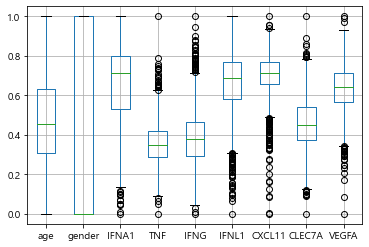

In [6]:
new_df.iloc[:, 1:10].boxplot()
plt

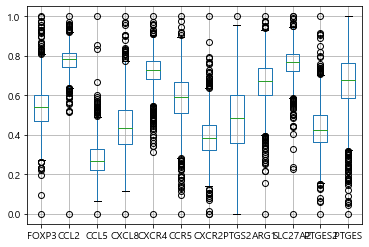

In [7]:
new_df.iloc[:, 10:].boxplot()
plt.show()

In [8]:
# calculate the Z-score for each numeric column in the DataFrame
z_scores = (new_df.select_dtypes(include='number') - new_df.select_dtypes(include='number').mean()) / new_df.select_dtypes(include='number').std()

# identify outliers as rows where any of the Z-scores are greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# remove rows with outliers
new_df = new_df[~outliers.any(axis=1)]
new_df

,D_name,age,gender,IFNA1,TNF,IFNG,IFNL1,CXCL11,CLEC7A,VEGFA,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
0,Normal,0.367647,0.0,0.798850,0.261206,0.305265,0.474599,0.560839,0.173526,0.592457,...,0.261896,0.289740,0.606598,0.408068,0.288896,0.140822,0.657298,0.662610,0.205484,0.632623
1,Normal,0.455882,0.0,0.807145,0.293963,0.237364,0.491151,0.741602,0.164802,0.638567,...,0.176126,0.204024,0.694884,0.491449,0.297545,0.118753,0.561872,0.644090,0.304814,0.576536
2,Normal,0.470588,0.0,0.868523,0.434391,0.309906,0.577716,0.899114,0.339086,0.709782,...,0.321742,0.218089,0.708622,0.634960,0.403492,0.229302,0.555649,0.710409,0.433222,0.667053
3,Normal,0.470588,0.0,0.789097,0.308507,0.223829,0.458200,0.739111,0.258866,0.665838,...,0.180831,0.215841,0.680053,0.581587,0.414769,0.228308,0.536094,0.682782,0.342887,0.638823
4,Normal,0.455882,0.0,0.796219,0.380851,0.225040,0.456471,0.763445,0.228523,0.665293,...,0.229535,0.223325,0.736660,0.608608,0.322165,0.238596,0.558509,0.613650,0.409589,0.648423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,CRC,0.808824,1.0,0.604392,0.248021,0.368748,0.452430,0.680395,0.510715,0.708942,...,0.266494,0.339714,0.758618,0.720361,0.480761,0.258664,0.630407,0.642960,0.536600,0.708872
1783,CRC,0.500000,0.0,0.802951,0.205043,0.405261,0.510625,0.595867,0.259814,0.571847,...,0.352508,0.172957,0.619979,0.654001,0.331275,0.333771,0.582691,0.855175,0.532987,0.711657
1784,HCC,0.794118,1.0,0.625033,0.102995,0.215483,0.431501,0.533962,0.289399,0.619962,...,0.239655,0.388660,0.762871,0.637112,0.407329,0.264010,0.709759,0.574611,0.456075,0.707194
1785,HCC,0.779412,0.0,0.637612,0.203506,0.379056,0.487656,0.696100,0.467286,0.668761,...,0.400903,0.500309,0.774486,0.538426,0.363161,0.345100,0.571569,0.721878,0.497098,0.650571


In [9]:
new_df.iloc[:,:].describe()

,age,gender,IFNA1,TNF,IFNG,IFNL1,CXCL11,CLEC7A,VEGFA,FOXP3,...,CCL5,CXCL8,CXCR4,CCR5,CXCR2,PTGS2,ARG1,SLC27A2,PTGES2,PTGES
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,...,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,0.460706,0.381885,0.673968,0.352760,0.380076,0.676476,0.713449,0.454801,0.640260,0.536055,...,0.272197,0.439863,0.727171,0.590785,0.389648,0.479861,0.670129,0.767620,0.428742,0.674753
std,0.206695,0.485997,0.164707,0.096556,0.122432,0.126908,0.080838,0.123548,0.107304,0.102989,...,0.078732,0.121442,0.068418,0.107790,0.092623,0.149959,0.100050,0.065972,0.102466,0.126877
min,0.000000,0.000000,0.161683,0.051758,0.000000,0.239646,0.413171,0.096529,0.294723,0.221610,...,0.067290,0.114219,0.491534,0.228444,0.081269,0.107360,0.345892,0.542113,0.123812,0.234151
25%,0.294118,0.000000,0.549094,0.287133,0.293302,0.594697,0.664027,0.373222,0.569663,0.468636,...,0.218937,0.353382,0.684449,0.520709,0.327442,0.358751,0.608551,0.726081,0.362133,0.596739
50%,0.441176,0.000000,0.720626,0.347429,0.376900,0.692252,0.717800,0.447753,0.643091,0.538153,...,0.266411,0.430653,0.729615,0.593178,0.386239,0.484031,0.675156,0.770839,0.424879,0.681904
75%,0.617647,1.000000,0.801888,0.416671,0.457395,0.768609,0.768989,0.535369,0.714236,0.602045,...,0.322272,0.519563,0.771878,0.665103,0.447727,0.598511,0.737693,0.811755,0.495470,0.765779
max,1.000000,1.000000,1.000000,0.659285,0.782630,1.000000,0.957429,0.813958,0.932000,0.859783,...,0.538965,0.825553,0.961354,0.902914,0.692550,0.863634,0.973717,0.986652,0.759388,1.000000


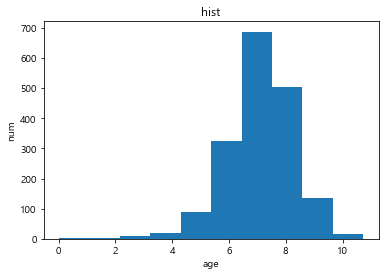

In [10]:
plt.hist(df['ARG1'], bins=10) 
plt.xlabel('age') 
plt.ylabel('num') 
plt.title('hist')
plt.show()

In [11]:
new_df['D_name'].value_counts()

Normal    1050
PDAC       342
CRC         96
BTC         96
PD          40
LC           5
HCC          5
Name: D_name, dtype: int64

In [12]:
X = new_df.iloc[:, 1:].values
#male, female은 gender와 겹치므로 age부터 특징 사용
y = new_df.loc[:, 'D_name']
# 모든 서로 관련있는 특징 찾기
boruta.fit(X, y)
selected_features = df.columns[19:][boruta.support_]


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	10
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	10
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	10
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	10
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	8
Iterat

In [13]:
# 결과 출력
print(boruta.support_)#True=유의미/False=무의미
print(boruta.ranking_)#작을수록 의미
print(boruta.n_features_)#유의미한 feature 개수
selected_features = data.columns[boruta.support_]
selected_features

[ True False  True  True False  True False  True False False  True  True
 False False False False False False False False False]
[ 1 14  1  1 11  1  9  1 12  5  1  1  7  4 13  2  4  6  2  8 10]
7


Index(['age', 'IFNA1', 'TNF', 'IFNL1', 'CLEC7A', 'CCL2', 'CCL5'], dtype='object')

* 유의미한 feature: 'age', 'IFNA1', 'TNF', 'IFNL1', 'CLEC7A', 'CCL2', 'CCL5'